# ImgLib2 

Example 6c - Complex numbers and Fourier transforms

## Introduction

In this example we show how to work with complex numbers and Fourier transforms. We show how to determine the location of a template in an image exploiting the *Fourier Shift Theorem*. We therefore compute the Fast Fourier Transform of a template, invert it and convolve it in Fourier space with the original image.

Computing an FFT is straight forward. It does not offer a static method because the instance of the FFT is required to perform an inverse FFT. This is necessary because the input image needs to be extended to a size supported by the 1-d FFT method (edu_mines_jtk.jar). In order to restore the complete input image, remembering those parameters is essential.

Note that for inverting the kernel we use methods defined for [**`ComplexType`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/ComplexType.html), also the basic math operations add, mul, sub and div are implemented in complex math. The inverse FFT finally takes the instance of the FFT as a parameter from which it takes all required parameters for a correct inversion.

The final convolution of the inverse template with the image is performed using the FourierConvolution (see example 6b). Note that all possible locations of the template in the image have been tested. The peak in the result image clearly marks the location of the template, while the computation time for the whole operation takes less than a second.

**Important: This source code is only GPLv2!**

Some utility methods can be found below.

In [1]:
import net.imglib2.type.numeric.RealType
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.util.RealSum

utility = new Object() {
  /**
   * Computes the sum of all pixels in an iterable using RealSum
   *
   * @param <T> value type
   * @param iterable - the image data
   * @return - the sum of values
   */
  public <T extends RealType<T>> double sumImage(final Iterable<T> iterable) {
    final RealSum sum = new RealSum()
    
    for (final T type : iterable) {
      sum.add(type.getRealDouble())
    }
    
    return sum.getSum()
  }
  
  /**
   * Norms all image values so that their sum is 1
   *
   * @param iterable - the image data
   */
  public void norm(final Iterable<FloatType> iterable) {
    final double sum = sumImage(iterable)
    
    for (final FloatType type : iterable) {
      type.setReal(type.get() / sum)
    }
  }
}

Script1​$1​@27ebfc03

The implementation is as follows...

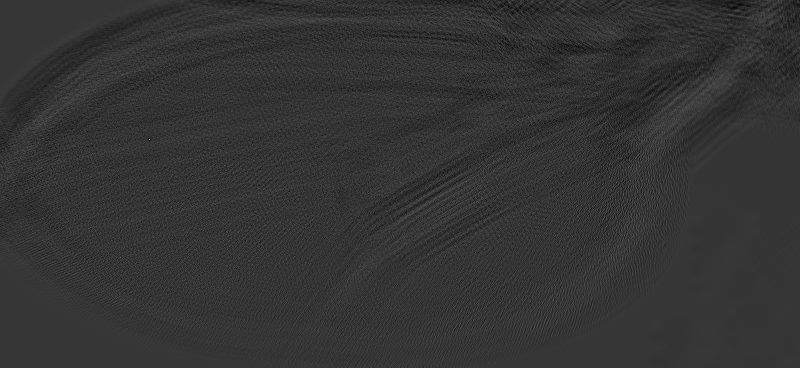

In [4]:
#@dependency(group = "net.imglib2", module = "imglib2-algorithm-gpl", version = "0.2.1")

import io.scif.img.ImgOpener
import net.imglib2.type.numeric.complex.ComplexFloatType
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.algorithm.fft.FourierConvolution
import net.imglib2.algorithm.fft.FourierTransform
import net.imglib2.algorithm.fft.InverseFourierTransform

// open image and kernel with ImgOpener as a FloatType
image = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType()).get(0)
template = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/WingTemplate.tif", new FloatType()).get(0)

fft = new FourierTransform<FloatType, ComplexFloatType>(template, new ComplexFloatType())
fft.process()
templateFFT = fft.getResult()

// complex invert the kernel
ComplexFloatType c = new ComplexFloatType()
for (ComplexFloatType t : templateFFT) {
  c.set(t)
  t.complexConjugate()
  c.mul(t)
  t.div(c)
}

// compute inverse fourier transform of the template
ifft = new InverseFourierTransform<FloatType, ComplexFloatType>(templateFFT, fft);
ifft.process()
templateInverse = ifft.getResult()

// normalize the inverse template
utility.norm(templateInverse)

// compute fourier convolution of the inverse template and the image
output = FourierConvolution.convolve(image, templateInverse)

The position where the template was located in the image is significantly visible: the brightest spot in the image.